## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
#Import all packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#load dataset
df=pd.read_csv('ab_data.csv')

In [4]:
#Display the dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#diplay no of rows in the dataset
row_count = df(len)

print('Total no. of rows =',row_count)

Total no. of rows = 294478


c. The number of unique users in the dataset.

In [4]:
unique_users = df.user_id.nunique()
print('The number of unique users = ',unique_users)

The number of unique users =  290584


d. The proportion of users converted.

In [5]:
converted_prop  = df['converted'].mean()
print('The proportion of users converted = ',converted_prop)

The proportion of users converted =  0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
result = len(df.query("(landing_page == 'new_page' & group != 'treatment') or (landing_page != 'new_page' & group == 'treatment')"))
print("The number of times the new_page and treatment don't line up  ",result)

The number of times the new_page and treatment don't line up   3893


f. Do any of the rows have missing values?

In [7]:
#Check for null values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

#### There is no missing value

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Create new dataset df2 that contains rows where treatment is aligned with new_page or control is  aligned with old_page.
df2=df.query("(landing_page == 'new_page' & group == 'treatment') or (landing_page == 'old_page' & group == 'control')")

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#count of unique user_id
unique_user_id = df2.user_id.nunique()
print(unique_user_id, 'unique user_ids are in df2')

290584 unique user_ids are in df2


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#dupliacte user_id
repeated_user_id = df2[df2.user_id.duplicated()]['user_id']
repeated_user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
#info of duplicate user_id
repeated_user_id_info = df2[df2['user_id'].duplicated()]
repeated_user_id_info

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [13]:
#Before removing the duplicates
Row_count_before = df2.shape[0]
Row_count_before

290585

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#drop  the duplicate user_id
df2=df2.drop_duplicates(subset='user_id')

In [15]:
#After removing the duplicates
Row_count_after= df2.shape[0]
Row_count_after

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#total converting rate
converting_rate = df2['converted'].mean()
print('The probability of an individual converting regardless of the page they receive is ',converting_rate)

The probability of an individual converting regardless of the page they receive is  0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#Converting rate of control group.
control_converting_rate = df2.groupby('group')['converted'].mean()[0]
control_converting_rate

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
#Converting rate of treatment group.

treatment_converting_rate=df2.groupby('group')['converted'].mean()[1]
treatment_converting_rate

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
#Total no. of new page
total_newpage=len(df2[df2['landing_page']=='new_page'])
total_newpage

145310

In [20]:
# probability that an individual received the new page
prob_newpage =total_newpage/len(df2)
prob_newpage

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

#### As it's clear from above analysis that conversion rate of control group(0.12) which is sightly more than treatment group(0.11) but only this is not sufficient in concluding which will lead to more conversion.So, we will look at other methods that will proof  which page has more conversion rate.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### Null hypotheses be converted rate of new pages is less than or equal to old pages
### Alternative hypotheses be converted rate of new pages is more than old pages

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
#Coversion rate of p_new is equal to the converted success rate regardless of page(given in instruction)
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
#Coversion rate of p_old is equal to the converted success rate regardless of page(given in instruction)
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
#No of new page
n_new = len(df2[df2['landing_page']=='new_page'])
n_new

145310

d. What is $n_{old}$?

In [24]:
# No of old page
n_old = len(df2[df2['landing_page']=='old_page'])
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
#Simulated values for p_new
new_page_converted = np.random.choice([0, 1], size = n_new, p = [p_new, 1 - p_new])
new_page_converted

array([1, 1, 0, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
#Simulated values for p_old

old_page_converted = np.random.choice([0, 1], size = n_old, p = [p_old, 1 - p_old])
old_page_converted

array([1, 1, 1, ..., 1, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
#difference between Simulated values for p_new amd p_old
diff = new_page_converted.mean() - old_page_converted.mean()


diff

-0.0027647811411395384

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
#Simulate the p_new and p_old  10000 times and store in array.
p_diffs=[]
for i in range(10000):
    new_page_converted = np.random.choice([0, 1],n_new,[p_new, 1 - p_new])
    old_page_converted = np.random.choice([0, 1],n_old,[p_old, 1 - p_old])
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

    


In [29]:
# putting simulated data in numpy array
p_diffs=np.array(p_diffs)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

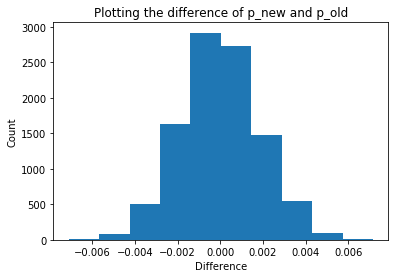

In [30]:
#plotting histogram for simulated data
plt.hist(p_diffs)
plt.title('Plotting the difference of p_new and p_old')
plt.xlabel('Difference');
plt.ylabel('Count');


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
#Calculating actual difference observed
obs_diff= df2.query('group =="treatment"').converted.mean() - df2.query('group =="control"').converted.mean()
obs_diff

-0.0015782389853555567

In [32]:
# Calculating  p_value
p_value = (p_diffs > obs_diff).mean()
p_value

0.808

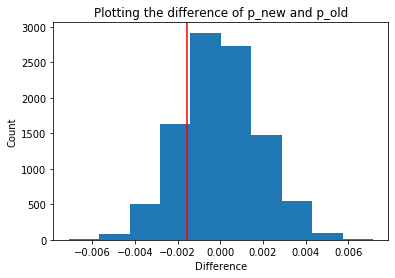

In [33]:
#plotting histogram for simulated data
plt.hist(p_diffs);
plt.axvline(obs_diff,color='red');
plt.title('Plotting the difference of p_new and p_old')
plt.xlabel('Difference');
plt.ylabel('Count');


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

####  The value in j part is known as p-value. As p-value( > 0.05) is very high, thus we fail to reject null hypotheses and concluded that old pages have higher conversion rate as compared to new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
#importing required library
import statsmodels.api as sm

#counting number of conversions in old and new page
convert_old = len(df2.query('landing_page == "old_page" & converted ==1'))
convert_new = len(df2.query('landing_page == "new_page" & converted ==1'))

#Counting no of old and new page
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

In [35]:
#Displaying results
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
#Computing test statisitic and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

#display z_score and p_value
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### z_score value is number of standard deviation data-point is from the population mean and here it's value(1.31) is less than 1.64 and hence we fail to reject the null hypotheses.
### p_value is greater than 0.05 thus we fail to reject the null hypotheses which is consistent with point j and k 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### Logistic Regression.



b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
#Adding intercept column
df2['intercept']=1

#Checking the newly added column
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [38]:
#Creating dummy variable columns
df2[['control','ab_page']]=pd.get_dummies(df['group'])

#Checking the newly added column
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
#import statsmodels 
import statsmodels.api as sm

#Preparing the regression model
lm = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result= lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
# showing regression model summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 16 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        22:17:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

### The p-value associated with ab_page is 0.19.
### This p-value(0.19) is much smaller as compared to Part II because in  Part II ,One sided test is done but in Logistic Regression is two sided test


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### It's good idea to consider other factors to add into your regression model as this may provide suitation where our test results will be more statistically significant.But the disadvantage is that we may face multicolinearity problem that i  the occurrence of high intercorrelations among independent variables in regression model that can lead to  misleading results.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
#Loading new dataset 
countries_df = pd.read_csv('./countries.csv')

# joining new dataset with df2
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

#Displaying the dataset after join
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [42]:
#Create the dummy variables columns
d= pd.get_dummies(df_new['country'])
df_new=df_new.join(d)

In [43]:
#Displaying the dataset
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [44]:
#preparing the regression model with three columns.
lm = sm.Logit(df_new['converted'], df_new[['intercept','UK', 'US']])
results = lm.fit()

#Displaying regression model summary
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 16 May 2020   Pseudo R-squ.:               1.521e-05
Time:                        22:17:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

### As p-value of both the countries(UK and US ) is more than 0.05, that's why there is no statistical evidence on country's significant impact on conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
#preparing the regression model with four columns that include countries and new page
lm = sm.Logit(df_new['converted'], df_new[['intercept','UK', 'US','ab_page']])
results = lm.fit()

#Displaying regression model summary
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 16 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        22:17:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

### As p-value of countries and new page are greater than 0.05. Thus countries and new page don't have any significant impact on conversion rate.

<a id='conclusions'></a>
## Conclusions

### We can conclude below points:
### 1 . In all the methods ,we can't reject the null hypotheses that the conversion rate of the new page is less or equal to the conversion rate of the old page.
### 2. Even after including other factor like country, the converion rate of new page hasn't improved.Thus we have no evidence which can proof new page as statistically and practically significant.

### So, the company should not implement the new page.


### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.